In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

#loading the dataset
file_path = 'StudentsPerformance.csv' 
StudentsPerformancedata= pd.read_csv(file_path)
StudentsPerformancedata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
StudentsPerformancedata.shape

(1000, 8)

In [7]:
StudentsPerformancedata.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [39]:
StudentsPerformancedata.duplicated().sum()

0

In [9]:
StudentsPerformancedata.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
def statistical_analysis(StudentsPerformancedata):
    """
    Function to perform statistical analysis and explain the findings.
    """

    numericdata = StudentsPerformancedata.select_dtypes(include=['number'])

    if numericdata.empty:
        print("No numeric data available for analysis.")
        return

    summary = numericdata.describe().T  # Transpose to better view the summary
    summary['skewness'] = numericdata.skew()  # Skewness
    summary['kurtosis'] = numericdata.kurtosis()  # Kurtosis
    print("Statistical Analysis:\n", summary)
    print("\nDetailed Explanation:")
    
    for column in numericdata.columns:
        mean = numericdata[column].mean()
        median = numericdata[column].median()
        std_dev = numericdata[column].std()
        skew = numericdata[column].skew()
        kurt = numericdata[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" - Mean: {mean}")
        print(f" - Median: {median}")
        print(f" - Standard Deviation: {std_dev}")
        print(f" - Skewness: {skew}")
        print(f" - Kurtosis: {kurt}")


        if skew > 0:
            print(f" - {column} has a positive skew, meaning the data is skewed to the right.")
        elif skew < 0:
            print(f" - {column} has a negative skew, meaning the data is skewed to the left.")
        else:
            print(f" - {column} has a symmetrical distribution.")

        if kurt > 3:
            print(f" - {column} has a leptokurtic distribution (more peaked than normal).")
        elif kurt < 3:
            print(f" - {column} has a platykurtic distribution (flatter than normal).")
        else:
            print(f" - {column} has a mesokurtic distribution (normal peak).")

        return

statistical_analysis(StudentsPerformancedata)

Statistical Analysis:
                 count    mean        std   min    25%   50%   75%    max  \
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0   
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0   
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0   

               skewness  kurtosis  
math score    -0.278935  0.274964  
reading score -0.259105 -0.068265  
writing score -0.289444 -0.033365  

Detailed Explanation:

math score Statistics:
 - Mean: 66.089
 - Median: 66.0
 - Standard Deviation: 15.163080096009468
 - Skewness: -0.27893514909431694
 - Kurtosis: 0.27496405752108455
 - math score has a negative skew, meaning the data is skewed to the left.
 - math score has a platykurtic distribution (flatter than normal).


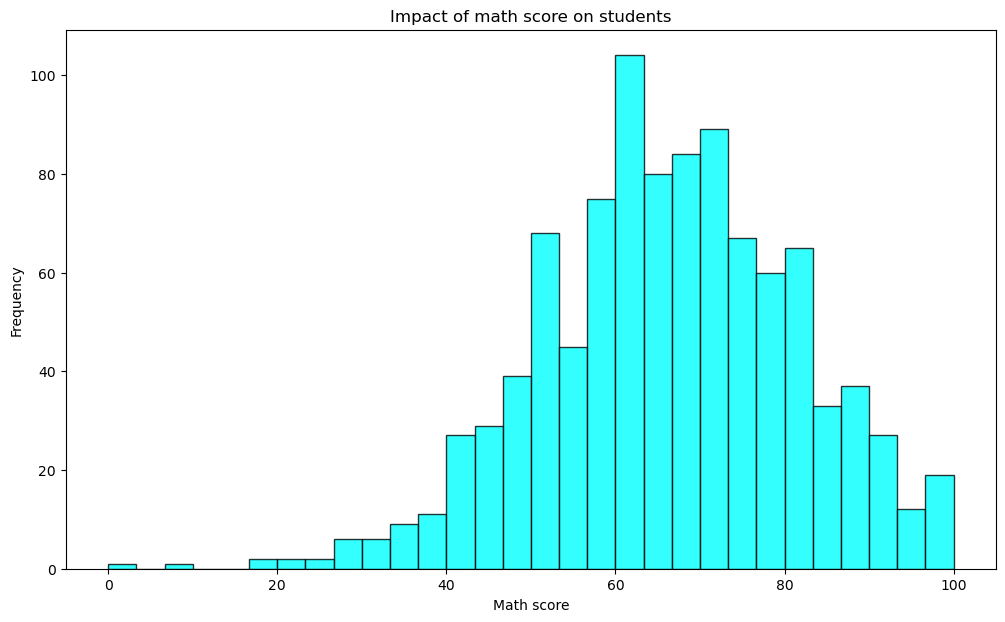

In [19]:
def histogram_plot():
    """
    Histogram plot function
    """
    plt.figure(figsize=(12, 7)) 
    plt.hist(StudentsPerformancedata['math score'], bins=30, color='cyan', alpha=0.8,edgecolor='black')
    plt.title("Impact of math score on students")
    plt.xlabel("Math score")
    plt.ylabel("Frequency")
    plt.xticks(ticks=range(0, 101, 20), fontsize=10, rotation=0)
    plt.show()
    return

histogram_plot()

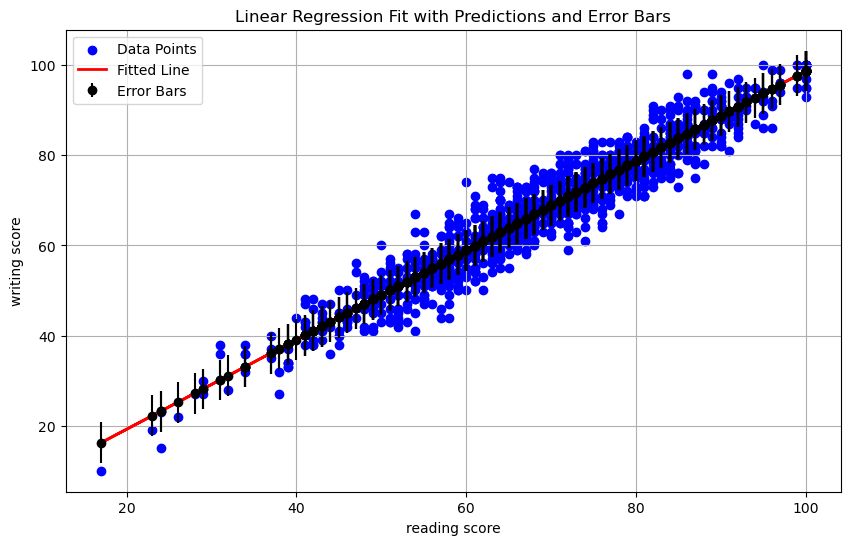

In [97]:
from sklearn.linear_model import LinearRegression
import numpy as np

def fitting_prediction():
    """
    Fit a linear regression model and predict the values with confidence intervals (error bars).
    """
    # Numerical data for regression
    columns = ['reading score', 'writing score']
    numerical_data = StudentsPerformancedata[columns]
    
    # Independent (X) and dependent (y) variables
    X = numerical_data[['reading score']].values  # Reshape to 2D for sklearn
    y = numerical_data['writing score'].values
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions and residuals (errors)
    y_pred = model.predict(X)
    residuals = y - y_pred
    std_error = np.std(residuals)  # Standard error for error bars
    
    # Plot the scatter and regression line with error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
    plt.errorbar(X, y_pred, yerr=std_error, fmt='o', color='black', label='Error Bars')
    plt.xlabel('reading score')
    plt.ylabel('writing score')
    plt.title('Linear Regression Fit with Predictions and Error Bars')
    plt.legend()
    plt.grid()
    plt.show()

fitting_prediction()


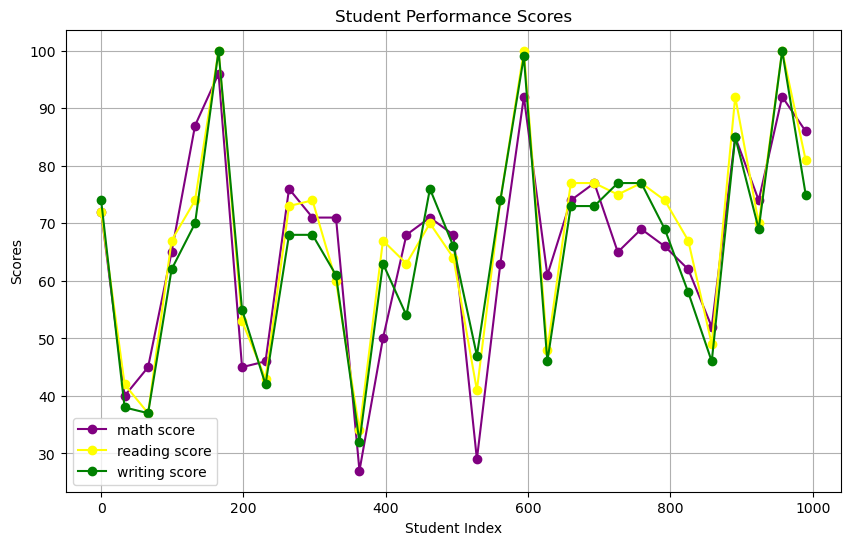

In [15]:
def plot_line_graph_with_colors(data, y_columns, sample_size=50, title="Line Graph", xlabel="Index", ylabel="Y-axis", colors=None):
    """
    Function to plot a less congested line graph for the given dataset.
    """
    sampled_data = data.iloc[::len(data)//sample_size]  # Reduce the dataset to sample_size points
    plt.figure(figsize=(10, 6))

    for i, y_column in enumerate(y_columns):
        line_color = colors[i] if colors and i < len(colors) else None
        plt.plot(sampled_data.index, sampled_data[y_column], label=y_column, marker='o', color=line_color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
plot_line_graph_with_colors(
    StudentsPerformancedata, 
    y_columns=['math score', 'reading score', 'writing score'], 
    colors=['purple', 'yellow', 'green'],  # Specify colors for each line
    sample_size=30, 
    title="Student Performance Scores", 
    xlabel="Student Index", 
    ylabel="Scores")

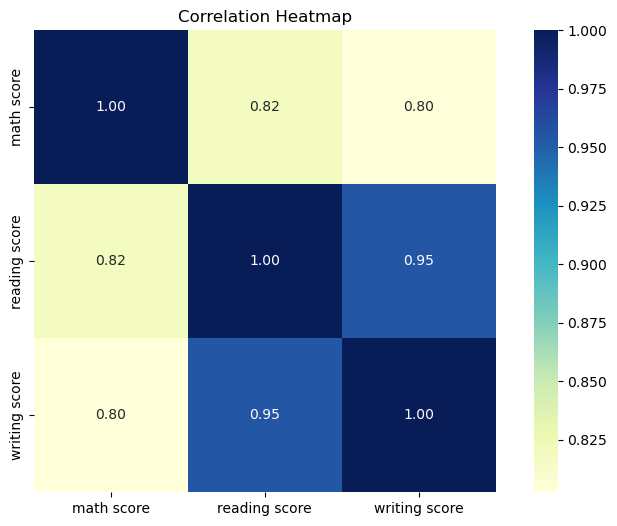

In [17]:
def heatmap_plot():
    """
    heatmap plot function
    """
    columns = ['test preparation course','math score','reading score','writing score']
    required_data= StudentsPerformancedata[columns]
    new_column_names = ['test preparation course','math score','reading score','writing score']
    required_data.columns = new_column_names
    numerical_data = required_data[['math score','reading score', 'writing score']]
    correlation_matrix = numerical_data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
    plt.title('Correlation Heatmap')
    plt.show()
    return

heatmap_plot()

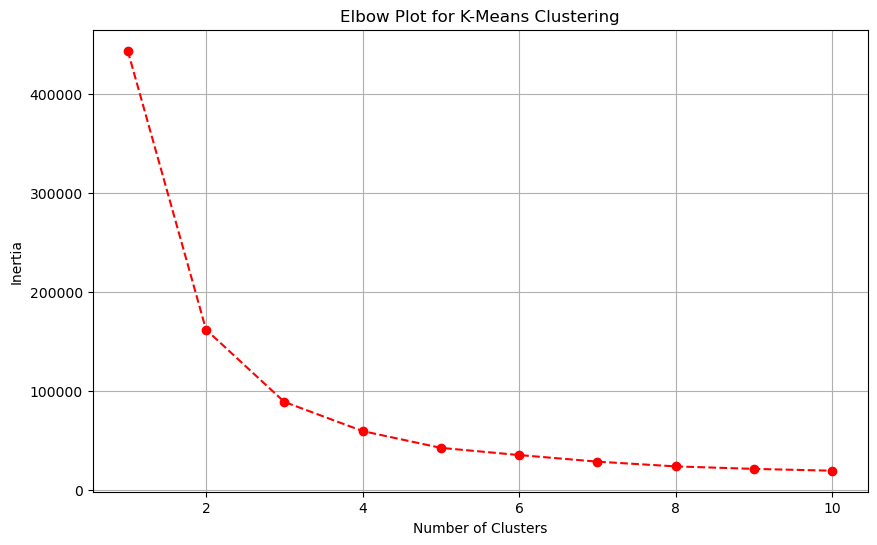

In [157]:
def elbow_plot():
    """
    elow plot function
    """
    
    numerical_data = StudentsPerformancedata[['reading score', 'writing score']]
    inertia_values = []
    cluster_range = range(1, 11)  # Test cluster counts from 1 to 10
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numerical_data)
        inertia_values.append(kmeans.inertia_)
    
    # Plot the elbow
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.grid()
    plt.show()

elbow_plot()